# WeatherPy
----

#### Observations

Based on the analysis performed the below observations have been made:

1. The closer the city is to the equator the warmer the temperature is. 
   This is evident in 3 graphs:
   * City Latitude vs. Max Temperature
   * Northern Hemisphere - Max Temp vs. Latitude 
   * Southern Hemisphere - Max Temp vs. Latitude 
   
   This observation makes sense since the equator is closer to the sun and receive the most direct sunlight. Latitudes closer to north or south pole receive less direct sun which results in a lower temperature.
   
   
2. After reviewing the graphs on wind speed no clear correlation between latitude and wind speed can be made. The plot points are very diverse and can have very different results with similar latitudes. Upon investigation the fact that there is no clear correlation makes sense since wind speed is determined by the air change between two pressure areas - the greater the pressure change the greater the wind speed. _(source: Barber, David. (2021, June 20). The Four Forces That Influence Wind Speed & Wind Direction. sciencing.com. Retrieved from https://sciencing.com/list-7651707-four-wind-speed-wind-direction.html)_


3. When comparing the "Northern Hemisphere - Max Temp" graph against the "Southern Hemisphere - Max Temp" graph, it appears that the Northern hemisphere has higher temperature in general than the Southern hemisphere. The Northern temperatures go up to 110 degrees fahrenheit whereas the Southern hemisphere temperatures only go up to 90 degrees fahrenheit. However, it is important to note that there are less cities in our data from the Southern hemisphere and therefore we would need more data before confirming this conclusion. 

    Upon investigation, it appears that the Southern hemisphere is warmer than the northern hemisphere because there is less land in the Southern hemisphere and more water. Water retains heat and results in the Southern hemisphere having a warmer climate. This further reinforces that we require more data before we can draw conclusions beyond the scope of the cities in our selection.
_(source: E, Phillip. (2016, Jan 27). Why is the southern hemisphere warmer than the northern? /socratic.org. Retrieved from https://socratic.org/questions/why-is-the-southern-hemisphere-warmer-than-the-northern#217714)_

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from datetime import datetime
# from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# Note: I added the random.seed method so that I could get the same cities each time for my analysis 
np.random.seed(11)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Firstly we establish the url for the open weather map site, noting that we want the units to be in "Imperial".
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="

# Next we create empty lists that we want filled by the for loop.
city_name = []
city_temp_max = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []
city_lat = []
city_lng = []

# We want to print a log in groups of 50, here we are setting the starting figures. 
counter = 0
set = 1

# This for loop is going through each city in the cities list and taking the information we want from the .json response.
# Each response required is added to the appropriate list defined early.

for city in cities:
    query_url = f"{url}{weather_api_key}&q={city}"
    response = requests.get(query_url).json()
    
    try:
             
        name = response["name"]
        city_name.append(name)
            
        temp = response["main"]["temp_max"]
        city_temp_max.append(temp)
    
        humidity = response["main"]["humidity"]
        city_humidity.append(humidity)
        
        clouds = response["clouds"]["all"]
        city_clouds.append(clouds)
        
        wind = response["wind"]["speed"]
        city_wind.append(wind)
        
        country = response["sys"]["country"]
        city_country.append(country)
        
        date = response["dt"]
        city_date.append(date)
        
        lat = response["coord"]["lat"]
        city_lat.append(lat)
        
        lng = response["coord"]["lon"]
        city_lng.append(lng)
        
        # Here the counter is asking if we have hit 50 results in the set. Once the counter is at 50 it resets back to 1.
        # Once the counter is reset, the set number is also increased by 1. 
        # If the counter has not hit 50, the counter is increased by 1 and no change is made to the set number.
        
        if counter > 49:
            counter = 1
            set += 1
            
        else:
            counter += 1
        
        # Printing the log as each city in the list is analysed.
        print(f"Processing Record {counter} of Set {set} | {city}")

    # If the city is not found, it is simply skipped. 
    except:
        print("City not found. Skipping...")

print("----------------------------------")
print("Data Retrieval Complete")
print("----------------------------------")

Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | rikitea
City not found. Skipping...
Processing Record 3 of Set 1 | port hawkesbury
Processing Record 4 of Set 1 | alyangula
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | barrow
City not found. Skipping...
Processing Record 9 of Set 1 | areosa
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | cabanas
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | geraldton
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | rabo de peixe
Processing Record 19 of Set 1 | boddam
Processing Record 20 of Set 1 | luderitz
Processing Record 21 of Set 1 | ahipara
Processing Record 22 of Set 1 | port alfred
Processing Record 23 of Set

City not found. Skipping...
Processing Record 38 of Set 4 | ulaanbaatar
Processing Record 39 of Set 4 | praia da vitoria
Processing Record 40 of Set 4 | san quintin
Processing Record 41 of Set 4 | lexington park
Processing Record 42 of Set 4 | jagtial
Processing Record 43 of Set 4 | boma
City not found. Skipping...
Processing Record 44 of Set 4 | bayangol
Processing Record 45 of Set 4 | aswan
Processing Record 46 of Set 4 | vastseliina
Processing Record 47 of Set 4 | ouro preto do oeste
Processing Record 48 of Set 4 | fare
Processing Record 49 of Set 4 | saint-georges
City not found. Skipping...
Processing Record 50 of Set 4 | aitape
Processing Record 1 of Set 5 | usoke
City not found. Skipping...
Processing Record 2 of Set 5 | deputatskiy
Processing Record 3 of Set 5 | valdivia
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of Set 5 | codrington
Processing Record 5 of Set 5 | nelson bay
Processing Record 6 of Set 5 | umm kaddadah
City not found. Skipping..

Processing Record 24 of Set 8 | ugoofaaru
Processing Record 25 of Set 8 | banjar
Processing Record 26 of Set 8 | cacador
Processing Record 27 of Set 8 | belmonte
Processing Record 28 of Set 8 | uva
Processing Record 29 of Set 8 | karratha
Processing Record 30 of Set 8 | porirua
Processing Record 31 of Set 8 | antofagasta
Processing Record 32 of Set 8 | coari
Processing Record 33 of Set 8 | sandwick
Processing Record 34 of Set 8 | grimshaw
Processing Record 35 of Set 8 | comodoro rivadavia
Processing Record 36 of Set 8 | sangin
Processing Record 37 of Set 8 | north bend
Processing Record 38 of Set 8 | dunedin
Processing Record 39 of Set 8 | wawa
Processing Record 40 of Set 8 | margate
Processing Record 41 of Set 8 | ambon
Processing Record 42 of Set 8 | nyurba
Processing Record 43 of Set 8 | mabopane
Processing Record 44 of Set 8 | yining
Processing Record 45 of Set 8 | saint-marc
Processing Record 46 of Set 8 | igrim
Processing Record 47 of Set 8 | chernaya kholunitsa
Processing Record

Processing Record 18 of Set 12 | kibungo
----------------------------------
Data Retrieval Complete
----------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# A DataFrame is created based on the info we added to the lists in the previous step.
weather_df = pd.DataFrame({"City": city_name, "Lat": city_lat, "Lng": city_lng, "Max Temp": city_temp_max,
                          "Humidity": city_humidity, "Cloudiness": city_clouds, "Wind Speed": city_wind,
                          "Country": city_country, "Date": city_date})

# The dataframe is then saved to a csv file.
weather_df.to_csv("output_data/cities.csv", encoding="utf-8", index=False, header=True)

In [6]:
# Displaying the dataframe. Here we confirm that there are over 500 cities in our list.
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,48.92,69,9,2.04,AU,1624153359
1,Rikitea,-23.1203,-134.9692,75.36,74,3,17.87,PF,1624153360
2,Port Hawkesbury,45.6169,-61.3485,62.01,91,90,5.01,CA,1624153361
3,Alyangula,-13.8483,136.4192,75.07,57,100,8.05,AU,1624153362
4,Puerto Ayora,-0.7393,-90.3518,73.54,88,81,8.99,EC,1624153362
...,...,...,...,...,...,...,...,...,...
563,Solnechnyy,50.7214,136.6319,70.77,31,89,6.87,RU,1624153768
564,Wanning,18.8003,110.3967,90.19,62,100,11.74,CN,1624153768
565,Oussouye,12.4850,-16.5469,78.98,75,100,8.30,SN,1624153769
566,Baruun-Urt,46.6806,113.2792,63.50,51,18,13.18,MN,1624153770


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Checking any cities in the list with humidity greater than 100 by using .loc on the humidity column with the criteria.
humidity_check = weather_df.loc[weather_df["Humidity"] > 100, :]

# No results are displayed in the list showing that there are no cities with a humidity greater than 100%
humidity_check

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
# Confirming the highest humidity value in the data is 100 by using the .describe() method.
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,19.564477,19.901909,67.941585,70.250000,53.771127,7.799894,1.624154e+09
std,33.602829,89.234021,13.778332,21.387848,40.298451,5.294119,1.295541e+02
min,-54.800000,-175.200000,30.290000,7.000000,0.000000,0.000000,1.624153e+09
25%,-8.711950,-57.584800,57.917500,59.750000,9.000000,3.582500,1.624153e+09
50%,22.655800,26.710450,69.370000,75.000000,63.000000,6.710000,1.624154e+09
75%,48.795100,100.446375,78.735000,86.000000,97.000000,10.987500,1.624154e+09
max,78.218600,179.316700,108.190000,100.000000,100.000000,30.870000,1.624154e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [9]:
# Getting the date that the city data is compiled so that we can identify the date the graphs are based on.
now = datetime.now()

# Changing the date format to appear how I want it to.
plot_date = now.strftime("%d %B, %Y")

# Displaying the date
plot_date

'20 June, 2021'

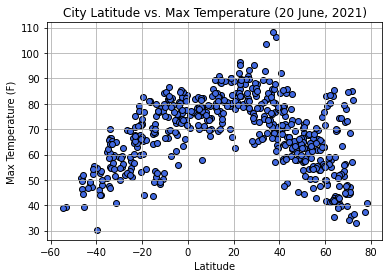

In [10]:
# setting the x and y variables.
x_data = weather_df["Lat"]
temp_data = weather_df["Max Temp"]

# Plotting the graph and adding the labels, title and displaying the grid.
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({plot_date})")
plt.grid()
plt.scatter(x_data, temp_data, marker="o", facecolor="royalblue", edgecolor="black")

# Saving a copy of the image to the output data folder.
plt.savefig("output_data/lat_temp.png", bbox_inches='tight');

# Displaying the graph.
plt.show()

The above graph plots the each cities latitude against the city max temperature. Based upon the location of the markers we can identify that cities with a laditude between 0 and 40 tend to have a higher temperature. It also appears that the further the city is from the equator (above or below) the lower the temperature reading is.

## Latitude vs. Humidity Plot

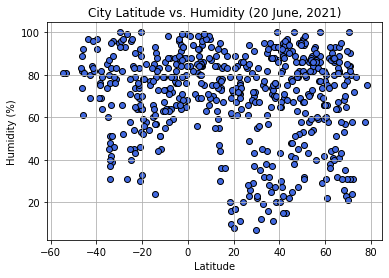

In [11]:
# setting the x and y variables.
x_data = weather_df["Lat"]
hum_data = weather_df["Humidity"]

# Plotting the graph and adding the labels, title and displaying the grid.
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({plot_date})")
plt.grid()
plt.scatter(x_data, hum_data, marker="o", facecolor="royalblue", edgecolor="black")

# Saving a copy of the image to the output data folder.
plt.savefig("output_data/lat_humidity.png", bbox_inches='tight');

# Displaying the graph.
plt.show()

The above graph plots the each cities latitude against the cities humidity. Based upon the result we can identify that most of the cities have a humidity of greater than 60%. It also appears that cities above a latitude of 20 have more diversity in the humidity readings. 

## Latitude vs. Cloudiness Plot

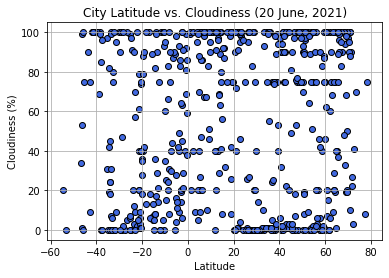

In [12]:
# setting the x and y variables.
x_data = weather_df["Lat"]
cloud_data = weather_df["Cloudiness"]

# Plotting the graph and adding the labels, title and displaying the grid.
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({plot_date})")
plt.grid()
plt.scatter(x_data, cloud_data, marker="o", facecolor="royalblue", edgecolor="black")

# Saving a copy of the image to the output data folder.
plt.savefig("output_data/lat_cloud.png", bbox_inches='tight');

# Displaying the graph.
plt.show()

The above graph plots the each cities latitude against the cities cloudiness. The results of this graph are very random.
There does not seem to be any correlation between latitude and the cloudiness percentage as there are a number of cities with similiar latitudes that have 100% cloudiness and 0% cloudiness.

## Latitude vs. Wind Speed Plot

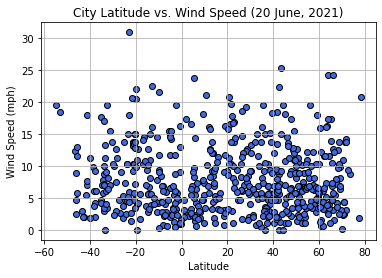

In [13]:
# setting the x and y variables.
x_data = weather_df["Lat"]
wind_data = weather_df["Wind Speed"]

# Plotting the graph and adding the labels, title and displaying the grid.
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({plot_date})")
plt.grid()
plt.scatter(x_data, wind_data, marker="o", facecolor="royalblue", edgecolor="black")

# Saving a copy of the image to the output data folder.
plt.savefig("output_data/lat_wind.png", bbox_inches='tight');

# Displaying the graph.
plt.show()

The above graph plots the each cities latitude against the cities wind speed. Based on the location of the city markers, we can identify that the majority of cities have a wind speed of 10 mph or below. The latitude does not seem to have much impact as the points are scatter quite evenly across the range.

## Linear Regression

In [14]:
# Creating a new dataframe for the Northern Hemisphere locations
northern_df = weather_df.loc[weather_df["Lat"] >= 0, :]
northern_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Port Hawkesbury,45.6169,-61.3485,62.01,91,90,5.01,CA,1624153361
7,Barrow,71.2906,-156.7887,35.62,80,90,13.80,US,1624153364
8,Areosa,41.7178,-8.8571,58.32,95,100,18.48,PT,1624153365
10,Saskylakh,71.9167,114.0833,85.01,24,22,14.14,RU,1624153367
11,Tasiilaq,65.6145,-37.6368,39.36,67,37,4.97,GL,1624153367
...,...,...,...,...,...,...,...,...,...
562,Luga,58.7372,29.8453,62.85,82,0,4.90,RU,1624153767
563,Solnechnyy,50.7214,136.6319,70.77,31,89,6.87,RU,1624153768
564,Wanning,18.8003,110.3967,90.19,62,100,11.74,CN,1624153768
565,Oussouye,12.4850,-16.5469,78.98,75,100,8.30,SN,1624153769


In [15]:
# Creating a new dataframe for the Southern Hemisphere locations
southern_df = weather_df.loc[weather_df["Lat"] < 0, :]
southern_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,48.92,69,9,2.04,AU,1624153359
1,Rikitea,-23.1203,-134.9692,75.36,74,3,17.87,PF,1624153360
3,Alyangula,-13.8483,136.4192,75.07,57,100,8.05,AU,1624153362
4,Puerto Ayora,-0.7393,-90.3518,73.54,88,81,8.99,EC,1624153362
5,Punta Arenas,-53.1500,-70.9167,39.31,81,0,18.41,CL,1624153343
...,...,...,...,...,...,...,...,...,...
545,Kawalu,-7.3817,108.2082,78.62,79,30,2.30,ID,1624153756
549,Vila Velha,-20.3297,-40.2925,66.15,100,75,3.44,BR,1624153758
556,Nokaneng,-19.6667,22.2667,60.35,52,79,10.89,BW,1624153763
560,Chissamba,-12.1667,17.3333,49.17,51,0,4.00,AO,1624153766


In [16]:
# To complete the linear regression plots I created a function to remove repetitive coding.
# For the function you input the variables in the linear equation.
# The variables are the x & y values, the coordinates you want the line equation to be (l1 & l2) and the graph colour.

# The equation calculates the correlation, completes the linregress calculation and prints the regress value.
# The line equation is also outlined and the graph plot details are defined.

def linear_regression(x_value, y_value, l1, l2, colour):
    correlation = st.pearsonr(x_value, y_value)
    print(f"The correlation coefficient between Latitude and Max temperature is {round(correlation[0],2)}")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    
    regress_value = x_value * slope + intercept
    print(f"The r-squared is: {rvalue**2}")
    
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 
    
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_equation,(l1, l2), fontsize=12, color="red")
    plt.scatter(x_value, y_value, marker="o", color=colour, edgecolor="black")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient between Latitude and Max temperature is -0.65
The r-squared is: 0.4257205240278384


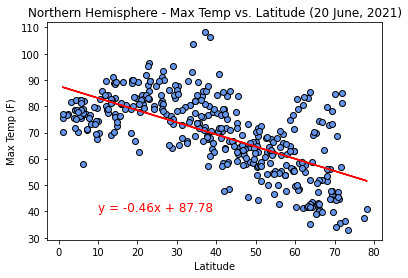

In [28]:
# Here we call our linear regression function and input the parameters.
linear_regression(northern_df["Lat"], northern_df["Max Temp"], 10, 40, "cornflowerblue")

# Define the graph labels, title, save the figure and then display the graph.
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude ({plot_date})")
plt.savefig("output_data/northern_lat_temp.png", bbox_inches='tight');
plt.show()

The above graph looks at the Northern Hemisphere cities latitude against the city max temperature. The linear regression modelling indicates a negative correlation between the two variables. The r-squared value is 0.43 which indicates a weak correlation. The negative correlation indicates that the further away the city is from the equator (0 latitude), the lower the temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient between Latitude and Max temperature is 0.73
The r-squared is: 0.5278974728290429


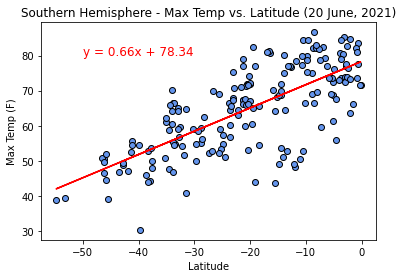

In [29]:
# Using the linear regression function and defining the parameters.
linear_regression(southern_df["Lat"], southern_df["Max Temp"], -50, 80, "cornflowerblue")

# Define the graph labels, title, save the figure and then display the graph.
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude ({plot_date})")
plt.savefig("output_data/southern_lat_temp.png", bbox_inches='tight');
plt.show()

The above graph looks at the Southern Hemisphere cities latitude against the city max temperature. The linear regression modelling indicates a positive correlation between the two variables. The r-squared value is 0.53 which indicates a moderate correlation. The positive correlation indicates that the closer the city is to the equator (0 latitude), the higher the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient between Latitude and Max temperature is -0.08
The r-squared is: 0.006094152504338056


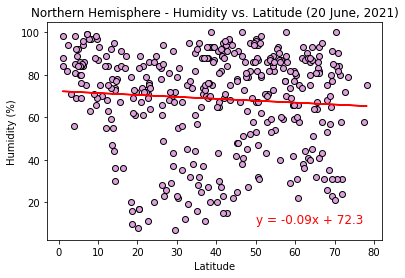

In [30]:
# Using the linear regression function and defining the parameters.
linear_regression(northern_df["Lat"], northern_df["Humidity"], 50, 10, "plum")

# Define the graph labels, title, save the figure and then display the graph.
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere - Humidity vs. Latitude ({plot_date})")
plt.savefig("output_data/northern_lat_humidity.png", bbox_inches='tight');
plt.show()

The above graph looks at the Northern Hemisphere cities latitude against the cities humidity. The linear regression modelling indicates a negative correlation between the two variables. The r-squared value is 0.005 which indicates a very weak to no correlation. There is great variation in the points with the majority of cities have a humidity above 60%.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient between Latitude and Max temperature is 0.05
The r-squared is: 0.0022146791437418936


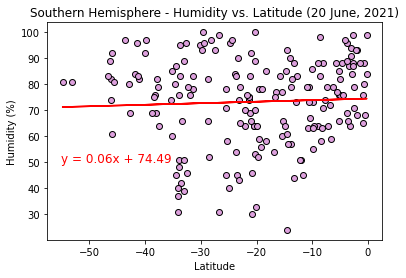

In [31]:
# Using the linear regression function and defining the parameters.
linear_regression(southern_df["Lat"], southern_df["Humidity"], -55, 50, "plum")

# Define the graph labels, title, save the figure and then display the graph.
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere - Humidity vs. Latitude ({plot_date})")
plt.savefig("output_data/southern_lat_humidity.png", bbox_inches='tight');
plt.show()

The above graph looks at the Southern Hemisphere cities latitude against the cities humidity.  The r-squared value is 0.0022 which indicates no correlation between the variables. There is great variation in the points with no clear relationship between the two. Again, the majority of points have a humidity greater than 60%.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient between Latitude and Max temperature is -0.03
The r-squared is: 0.0011451302242745482


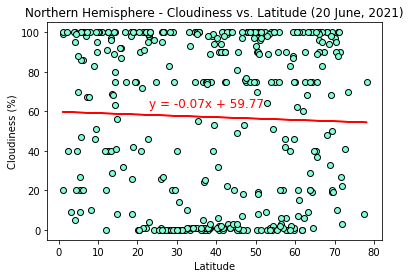

In [32]:
# Using the linear regression function and defining the parameters.
linear_regression(northern_df["Lat"], northern_df["Cloudiness"], 23, 62, "aquamarine")

# Define the graph labels, title, save the figure and then display the graph.
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude ({plot_date})")
plt.savefig("output_data/northern_lat_cloudiness.png", bbox_inches='tight');
plt.show()

The above graph looks at the Northern Hemisphere cities latitude against the cities cloudiness. The linear regression modelling indicates a very weak negative correlation between the two variables. The r-squared value is 0.0011 which indicates no correlation. There is great variation in the points with no clear relationship between the two variables.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient between Latitude and Max temperature is -0.0
The r-squared is: 8.830364615573641e-06


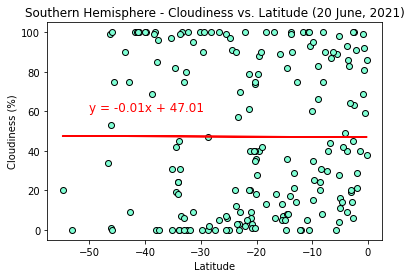

In [33]:
# Using the linear regression function and defining the parameters.
linear_regression(southern_df["Lat"], southern_df["Cloudiness"], -50, 60, "aquamarine")

# Define the graph labels, title, save the figure and then display the graph.
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Hemisphere - Cloudiness vs. Latitude ({plot_date})")
plt.savefig("output_data/southern_lat_cloudiness.png", bbox_inches='tight');
plt.show()

The above graph looks at the Southern Hemisphere cities latitude against the cities cloudiness. The linear regression modelling indicates a positive correlation and the r-squared value is 0.0000088 which indicates no correlation between the variables. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient between Latitude and Max temperature is -0.0
The r-squared is: 6.493589131355307e-06


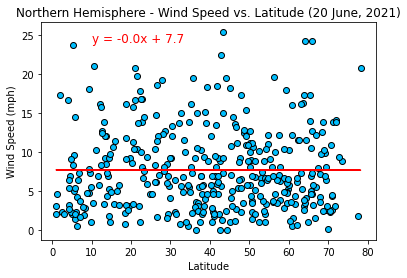

In [34]:
# Using the linear regression function and defining the parameters.
linear_regression(northern_df["Lat"], northern_df["Wind Speed"], 10, 24, "deepskyblue")

# Define the graph labels, title, save the figure and then display the graph.
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Northern Hemisphere - Wind Speed vs. Latitude ({plot_date})")
plt.savefig("output_data/northern_lat_windspeed.png", bbox_inches='tight');
plt.show()

The above graph looks at the Northern Hemisphere cities latitude against the cities wind speed. The linear regression line indicates a positive correlation however, the r-squared value is 0.0000065 which indicates no correlation between the variables. Based on the location of the points, it appears that the majority of cities have a wind speed of less than 10mph.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient between Latitude and Max temperature is -0.12
The r-squared is: 0.013927592619817984


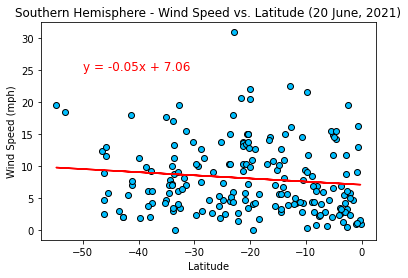

In [35]:
# Using the linear regression function and defining the parameters.
linear_regression(southern_df["Lat"], southern_df["Wind Speed"], -50, 25, "deepskyblue")

# Define the graph labels, title, save the figure and then display the graph.
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Southern Hemisphere - Wind Speed vs. Latitude ({plot_date})")
plt.savefig("output_data/southern_lat_windspeed.png", bbox_inches='tight');
plt.show()

The above graph looks at the Southern Hemisphere cities latitude against the cities wind speed. The linear regression line indicates a negative correlation however, the r-squared value is 0.014 which indicates no correlation between the variables. Again, based on the location of the points, it appears that the majority of cities have a wind speed of less than 10mph.